## Trotter project

### ハミルトニアン基底エネルギーの計算 (t 決定用)

In [3]:
import trotter_error_plt as tep
import numpy as np

Hchain = 7 # H-chain の原子数
jw_hamiltonian, E, ham_name, num_qubits = tep.jw_hamiltonian_maker(Hchain)
print(E)
print(f'Et = -π/4 を満たす t = {- np.pi / (4 * E) }')
print(f'Et = -3π/4 を満たす t = {- np.pi*3 / (4 * E) }')
print(f'Et = -5π/4 を満たす t = {- np.pi*5 / (4 * E) }')

H7_sto-3g_triplet_1+_distance_100_charge_1
-3.2811637203299107
Et = -π/4 を満たす t = 0.2393657343372305
Et = -3π/4 を満たす t = 0.7180972030116916
Et = -5π/4 を満たす t = 1.1968286716861525


### Error plt

#### t の値：
Et = ± $\pi$ / 2 となるような t は避ける。経験的に、小数点1桁離せばほぼ直線となる。目安として Et  $\sim n * \pi$ / 4 となるような t を選んだ。  
高次の積公式では、Et  $\sim \pi$ / 4 だと、誤差がマシンイプシロンに引っかかるため、 Et  $\sim 3 * \pi$ / 4 などに調整。Morales の積公式は $\sim 3 * \pi$ / 4 推奨  
ステップ幅は t の 0.002 程度


#### t の例 （Morales 以外, Morales）
$H_2$ : 0.73, 2.21  
$H_3$ : 0.75, 2.27  
$H_4$ : 0.37, 1.12  
$H_5$ : 0.36, 1.08  
$H_6$ : 0.25, 1.25  
$H_7$ : 0.23, 1.19  


#### 積公式の種類表記(num_w)：
2nd : 2次,  
4th : 4次,  
8th(Yoshida) : Yoshidaの8次,  
8th(Morales) : Moralesらの8次(m=8),  
10th(Morales) : Moralesらの10次(m=16),  
4th(new_2) : 新構築4次(係数2個),  
4th(new_3) : 新構築3次(係数3個) 


#### フィッティング結果：
ディレクトリ : "trotter_expo_coeff_gr" に保存される。保存されるのは、誤差 $\alpha t^p$ のスケーリングを、$\alpha, p$ の両方で行ったもの、と $p$ を次数で固定し、$\alpha$ だけでスケーリングしたもの。  
保存名は、"｛ハミルトニアンの情報｝＿｛num_w｝＿｛$p$ を固定しているのであれば ave｝"  
ハミルトニアン:H3, 使用積公式:4次, $p$ の固定ありの場合の保存名例:  
H3_sto-3g_triplet_1+_distance_100_charge_1_grouping_Operator_4th_ave

ローカル CPU だと $H_7$ あたりが限界

H7_sto-3g_triplet_1+_distance_100_charge_1
converged SCF energy = -3.28116372032991
sum of all grouped terms == original Hamiltonian?
diffinision0
True
validation of the group:
energy_-3.035816265019813
error exponent :[7.94246671]
error coefficient :[6.57323206e-08]
r^2 (log-log): 0.9999999998522531
データを /home/abe/myproject/Evaluation_numGate_highorder/trotter_expo_coeff_gr/H7_sto-3g_triplet_1+_distance_100_charge_1_grouping_Operator_8th(Morales)_ave に保存しました。
average_coeff:6.506206403819393e-08


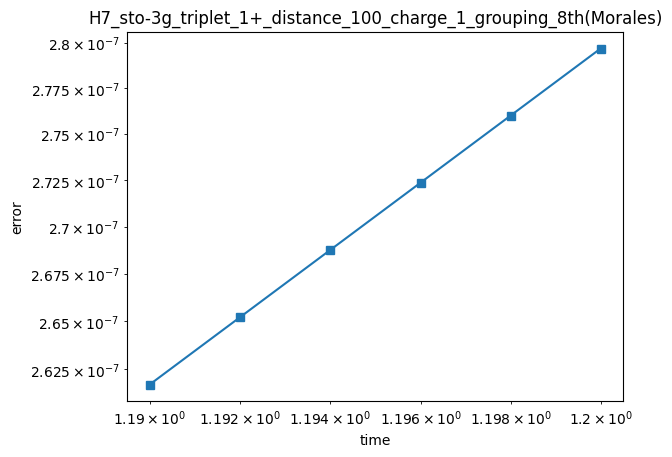

In [2]:
import trotter_error_plt as tep
s_time = 1.19 # 初時刻
e_time = 1.20 # 終時刻
dividing = 0.002 # ステップ幅

Hchain = 7 # H-chain
num_w = '4th' # 使用積公式
storage = None # フィッティング α, p 保存可否
avestrage = True # フィッティング α (p 固定) 保存可否
# tep.trotter_error_plt_qc_gr(s_time, e_time, dividing, Hchain, num_w, storage, avestrage)

# 同一 t の場合の一括用
num_w_list = ["2nd", "4th", "8th(Yoshida)", "4th(new_2)", "4th(new_3)"]
num_w_list = ["8th(Morales)"]
for w in num_w_list:
    tep.trotter_error_plt_qc_gr(s_time, e_time, dividing, Hchain, w, storage, avestrage)

### 摂動論による基底エネルギーの推定誤差(直接対角化との比較) (FIG.A.2)

converged SCF energy = -1.06610864931794
H2_sto-3g_singlet_distance_100_charge_0
error exponent :[2.0000125]
error coefficient :[0.00324142]
r^2 (log-log): 0.9999999999992941
average_coeff:0.0032412354976462366
H2_sto-3g_singlet_distance_100_charge_0
multiprocessing done
error exponent :2.000005255402992
error coefficient :0.003241300801204827
r^2 (log-log): 0.9999999999998619
average_coeff:0.0032412229565336723


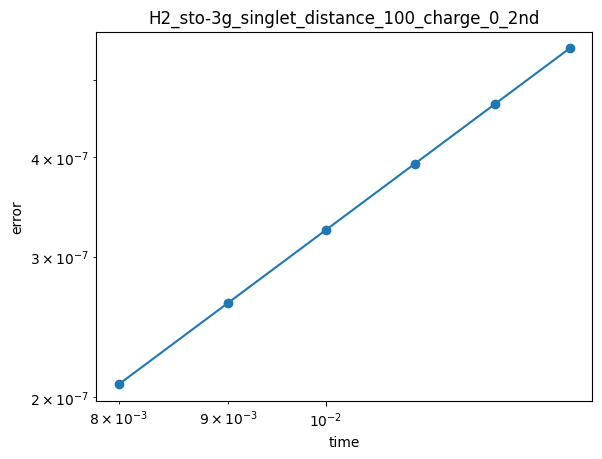

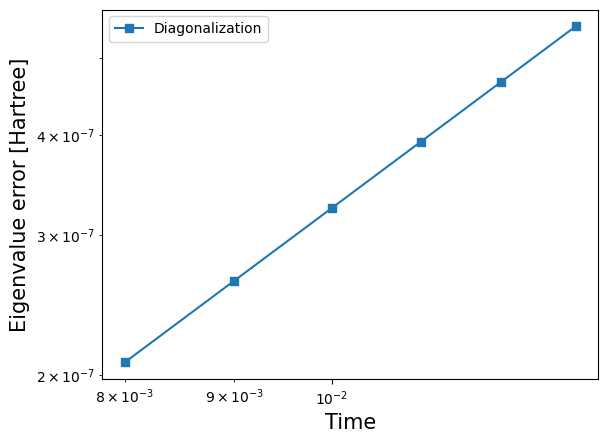

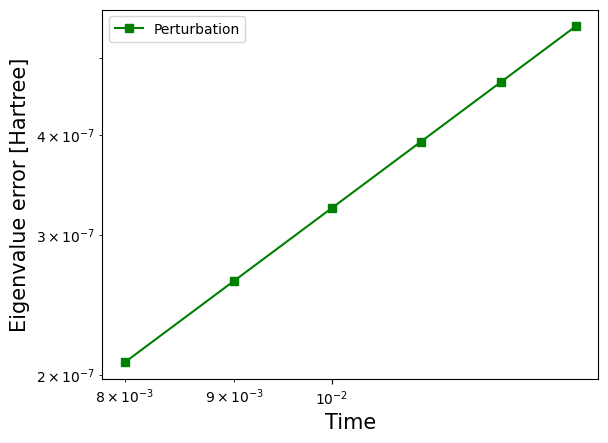

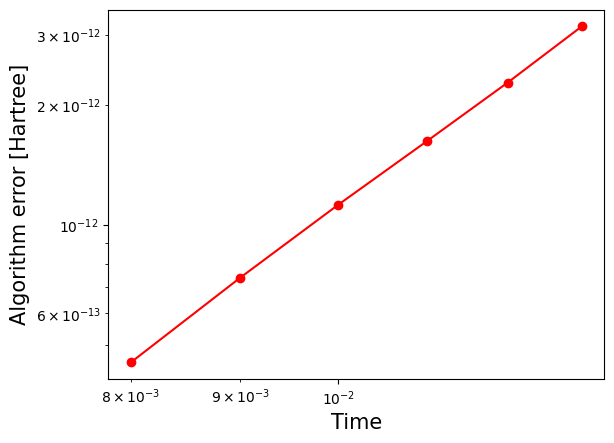

In [1]:
import trotter_error_plt as tep
s_time = 0.008 # 初時刻
e_time = 0.014 # 終時刻
dividing = 0.001 # ステップ幅
Hchain = 2 # H-chain
num_w = '2nd' # 使用積公式
storage = None # フィッティング α, p 保存可否
avestrage = None # フィッティング α (p 固定) 保存可否
tep.trotter_error_plt_qc(s_time, e_time, dividing, Hchain, num_w, storage, avestrage)

### extrapolation  (FIG.1, FIG.2)
H-chain の総計算量をプロットして、そのプロットを使って、外挿を行う。  
ディレクトリ "trotter_expo_coeff_gr" のスケーリング結果の $\alpha, p$ から総計算量を決定し、それに対して外挿する。  
そのため、変数 Hchain の原子数において上の Error plt でフィッティングを行っている必要がある。  
H $_2$ ~  H $_7$ までのフィッティングでも論文と同様の結果が得られる。フォルダには $H_{15}$ までのフィッティング結果を格納済み

H2_sto-3g_singlet_distance_100_charge_0
H3_sto-3g_triplet_1+_distance_100_charge_1
H4_sto-3g_singlet_distance_100_charge_0
H5_sto-3g_triplet_1+_distance_100_charge_1
H6_sto-3g_singlet_distance_100_charge_0


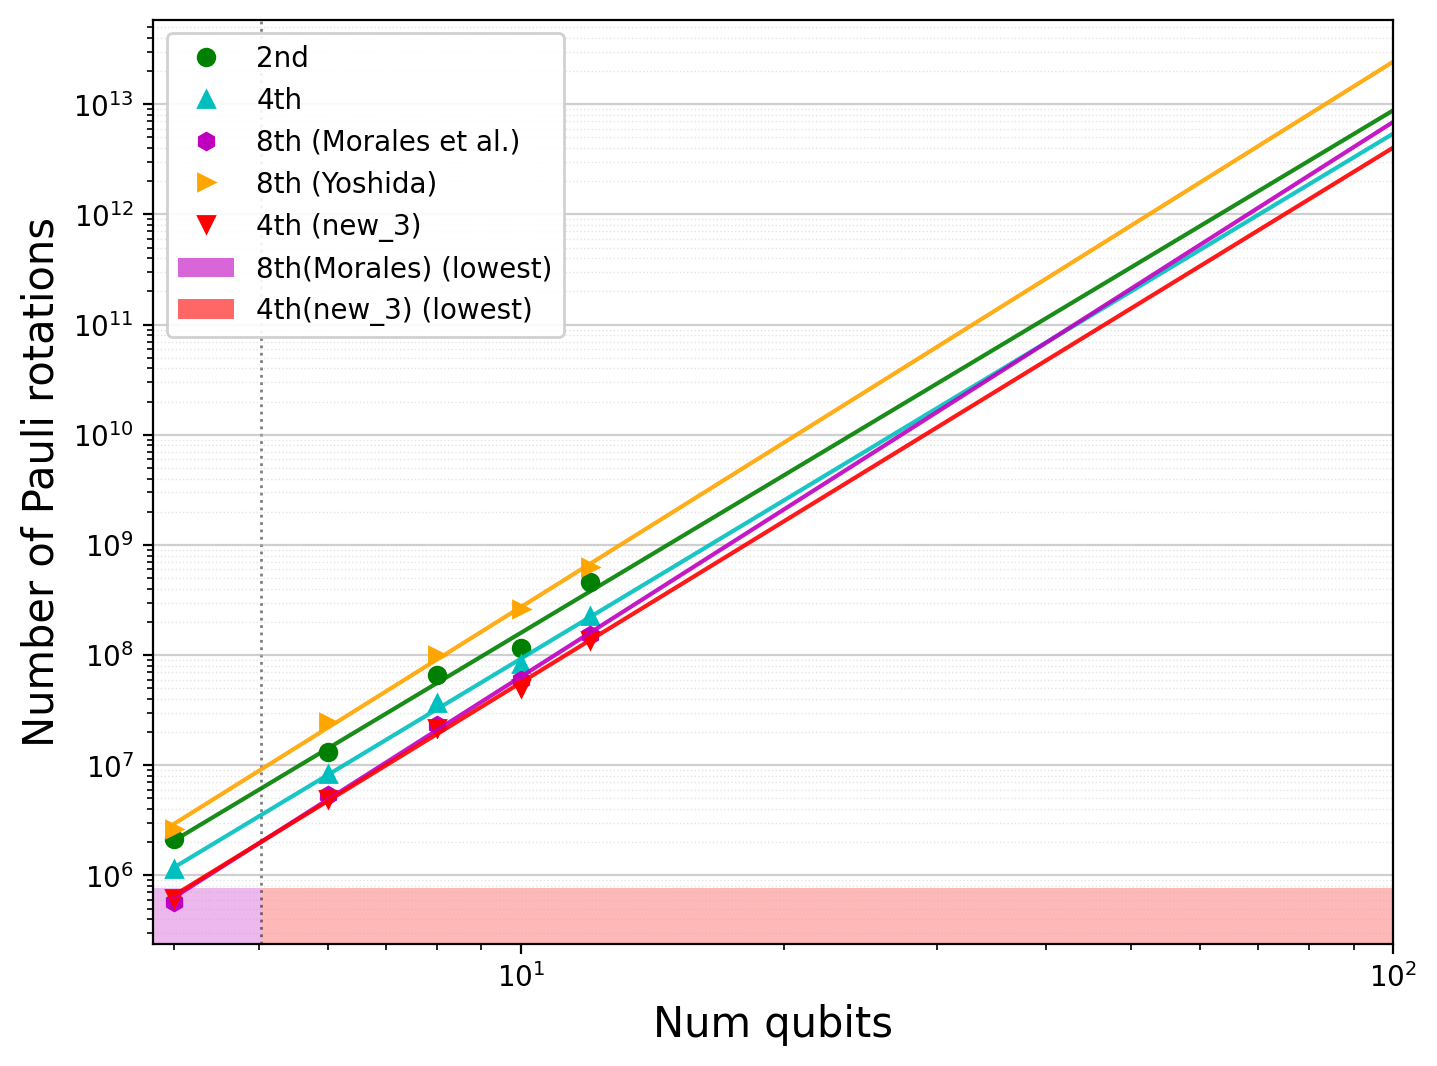

In [2]:
import trotter_error_plt as tep
Hchain = 6 # プロットを行う H-chain の原子数。上の Error plt でスケーリング済みの必要あり。
n_w_list = ['2nd', '4th', '8th(Morales)', '8th(Yoshida)', '4th(new_3)'] # 比較するPF
tep.exp_extrapolation(Hchain, n_w_list, show_bands=True) # show_bands: 外挿の最小Fとなる PF の色帯をプロット下部に表示 

### 積公式構築
$t^k$ までのテイラー展開で数値最適化を行い積公式のパラメータ[$w_1,...w_m$]を決定。残差が threshold より小さくなるパラメータを n_targets 個集めてその中で最も残差が小さいものを返す

In [ ]:
import optimal_trotter

best_w, best_total = optimal_trotter.parallel_find(m=2, k=4, n_targets=10, threshold=1e-17)
print(f"最良の optimalw: {best_w}")
print(f"対応する total: {best_total}") # 残差

最良の optimalw: [0.59499367 0.2943892 ]
対応する total: 1.0164395367051604e-18


#### 残差比較

In [ ]:
import numpy as np
import optimal_trotter

cand_search_best = {
    "name": "search_best",
    "w_free": [0.42008729, 0.40899193]
}

cand_known = {
    "name": "known_formula",
    "w_free": [0.29534665, 0.59302617]
}


results = optimal_trotter.compare_residuals(
    formulas=[cand_search_best, cand_known],
    k=5,
    sort_by="l2"   # L1ノルム(総誤差)が小さい順に並べる
)

for r in results:
    print("----", r["name"], "----")
    print("  L1 sum  :", r["l1"])
    print("  L2 norm :", r["l2"])
    print("  Linf max:", r["linf"])
    print("  w_free  :", r["w_free"])
    # 必要なら r["rest_vec"] (np.longdoubleでの項別のズレ) も見れる


---- search_best ----
  L1 sum  : 0.039866335337528945
  L2 norm : 0.008970465504813528
  Linf max: 0.004442794159854848
  w_free  : [0.42008729 0.40899193]
---- known_formula ----
  L1 sum  : 0.05445272786621607
  L2 norm : 0.012580145070478667
  Linf max: 0.0067086293029674
  w_free  : [0.29534665 0.59302617]


### $\beta$ スケーリング

#### スケーリング例 (FIG.A.1)

α (fixed) = 1.0
β (fitted) = 1.433


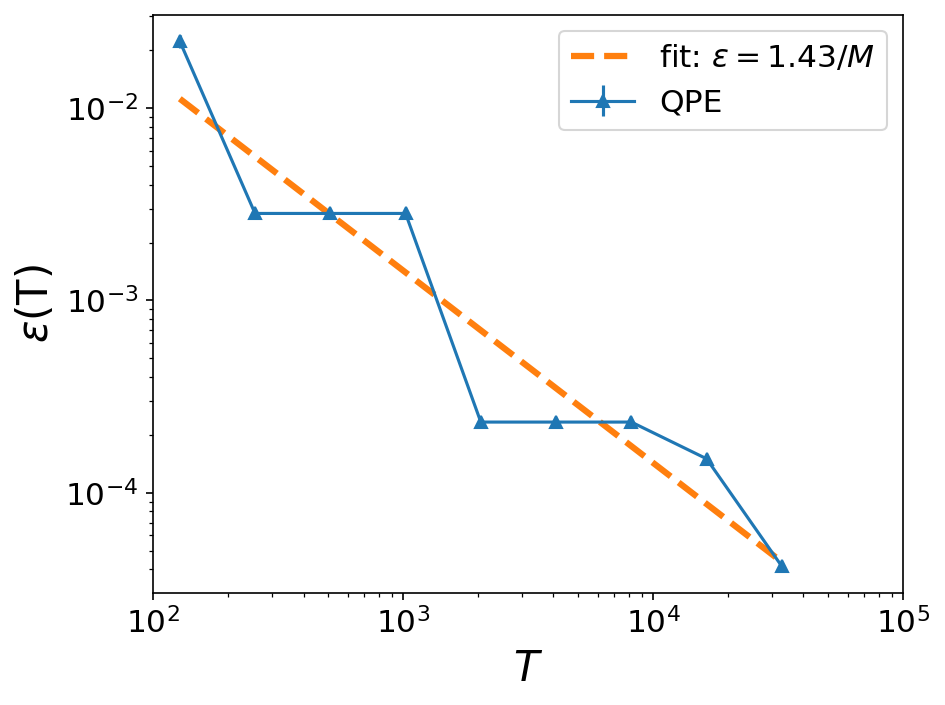

In [1]:
import trotter_error_plt as tep
import numpy as np
T_list_QPE = np.array([128,256,512,1024,2048,4096,8192,16384,32768]) # M
N_rep = 10       # 繰り返し回数
N_QPE = 100 # サンプリング数
initial_phi = [-1.5]
tep.beta_plt(T_list_QPE, N_rep, N_QPE, initial_phi)

In [1]:
import trotter_error_plt as tep
import numpy as np
T_list_QPE = np.array([128,256,512,1024,2048,4096,8192,16384,32768]) # M
N_rep = 10       # 繰り返し回数
N_QPE = 100 # サンプリング数
tep.beta_scaling(T_list_QPE, N_rep, N_QPE)

Mean beta_fix over 100 trials: 1.20895827228886
Std  beta_fix over 100 trials: 0.48379796103054173
